In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import rnn


First, we create some data.  In a real example, this would be loaded up out of the file.

In this case, `input_data` is two values, and `output_data` is one value (the thing we're trying to predict given the `input_data`).  For the particular data I've generated here, you can't do it given only the current `input_data`; you can only make an accurate prediction given the previous `input_data` as well.

In [2]:
t = np.arange(50)*0.05
input_data = np.sign(np.array([np.sin(2*np.pi*t),np.sin(2*np.pi*t)]).T).astype(float)
input_data += np.random.normal(size=input_data.shape)*0.1
output_data = (np.sign(np.sin(2*np.pi*t*2+np.pi)).astype(float)+1)/2

print('Input Data', input_data)
print('Output Data', output_data)

Input Data [[-0.04232901  0.09917454]
 [ 0.8426753   0.88931797]
 [ 0.89181424  1.15841686]
 [ 1.11104236  1.10323198]
 [ 1.1024365   0.98359989]
 [ 0.9294331   0.88676824]
 [ 0.98303489  1.20218821]
 [ 1.03151294  0.96535025]
 [ 1.2600413   1.11101549]
 [ 0.9358737   1.11825045]
 [ 0.93040759  0.85344186]
 [-0.92522425 -0.85318536]
 [-1.08492878 -0.86590195]
 [-1.02661204 -1.0483429 ]
 [-0.9717235  -0.84026395]
 [-1.02163163 -1.03566497]
 [-1.09635253 -0.86213084]
 [-1.0026814  -0.82396295]
 [-1.01701411 -1.01907775]
 [-0.98439261 -1.08874237]
 [-0.94407735 -1.04049648]
 [ 0.94206369  1.04211453]
 [ 0.88162538  0.94258468]
 [ 0.794987    0.85581064]
 [ 1.01220763  0.88006289]
 [ 1.13933018  1.09401004]
 [ 0.98401723  0.87785847]
 [ 1.02214654  0.99210294]
 [ 0.99353376  0.99154158]
 [ 0.95545053  0.89364635]
 [ 1.08027534  0.9108535 ]
 [-0.89835819 -0.80895697]
 [-0.91163228 -1.06545291]
 [-1.09966017 -0.94073604]
 [-0.93932836 -1.10669001]
 [-0.94720038 -1.09262729]
 [-1.23337907 -0.

Let's plot that data, just to make it clearer

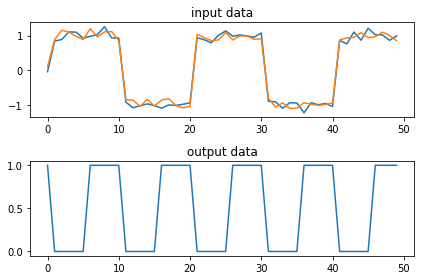

In [3]:
plt.subplot(2,1,1)
plt.plot(input_data)
plt.title('input data')
plt.subplot(2,1,2)
plt.plot(output_data)
plt.title('output data')
plt.tight_layout()
plt.show()

Now we need to make our network and train it.

In [11]:
n_epochs = 4000   # number of times to run the training
n_units = 200     # size of the neural network
n_classes = 1     # number of values in the output
n_features = 2    # number of values in the input

Now we create our network.  I don't quite understand exactly what's happening here, but I copied it from an LSTM tutorial. 

In [5]:
X = tf.placeholder('float',[None,n_features])
Y = tf.placeholder('float')

weights = tf.Variable(tf.random_normal([n_units, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

x = tf.split(X, n_features, 1)
lstm_cell = rnn.BasicLSTMCell(n_units)    
outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)   
output = tf.matmul(outputs[-1], weights) + bias
output = tf.reshape(output, [-1])

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output, labels=Y))
optimizer = tf.train.AdamOptimizer().minimize(cost)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Use tf.cast instead.


Now we train it.

In [6]:
with tf.Session() as session:

    # initialize the network
    tf.global_variables_initializer().run()
    tf.local_variables_initializer().run()

    # now do the training
    for epoch in range(n_epochs):
        # this does one pass through the traiing
        _, error = session.run([optimizer, cost], feed_dict={X: input_data, Y: output_data})

        # print a message every 100 epochs
        if epoch % 100 == 0:
            print('Epoch', epoch, 'completed out of', n_epochs, 'error:', error)

    # now compute the output after training
    pred = tf.round(tf.nn.sigmoid(output)).eval({X: input_data})

Epoch 0 completed out of 4000 loss: 0.73743975
Epoch 100 completed out of 4000 loss: 0.69281006
Epoch 200 completed out of 4000 loss: 0.6913105
Epoch 300 completed out of 4000 loss: 0.6881987
Epoch 400 completed out of 4000 loss: 0.6789093
Epoch 500 completed out of 4000 loss: 0.6650203
Epoch 600 completed out of 4000 loss: 0.65867543
Epoch 700 completed out of 4000 loss: 0.6538023
Epoch 800 completed out of 4000 loss: 0.63824755
Epoch 900 completed out of 4000 loss: 0.60115725
Epoch 1000 completed out of 4000 loss: 0.57536954
Epoch 1100 completed out of 4000 loss: 0.5344367
Epoch 1200 completed out of 4000 loss: 0.50100875
Epoch 1300 completed out of 4000 loss: 0.48381713
Epoch 1400 completed out of 4000 loss: 0.4717062
Epoch 1500 completed out of 4000 loss: 0.4608936
Epoch 1600 completed out of 4000 loss: 0.45047417
Epoch 1700 completed out of 4000 loss: 0.43986458
Epoch 1800 completed out of 4000 loss: 0.42642507
Epoch 1900 completed out of 4000 loss: 0.40497398
Epoch 2000 completed

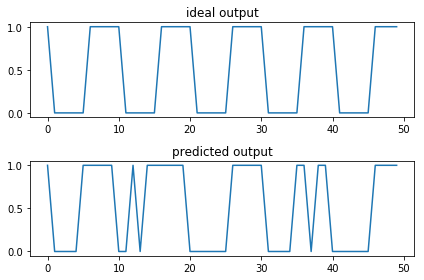

In [10]:
plt.subplot(2, 1, 1)
plt.title('ideal output')
plt.plot(output_data)
plt.subplot(2, 1, 2)
plt.title('predicted output')
plt.plot(pred)
plt.tight_layout()
plt.show()